In [10]:
# Install the FRED API library
!pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='8113cdc4e493b053702c8f7760eecb25')

In [11]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [12]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


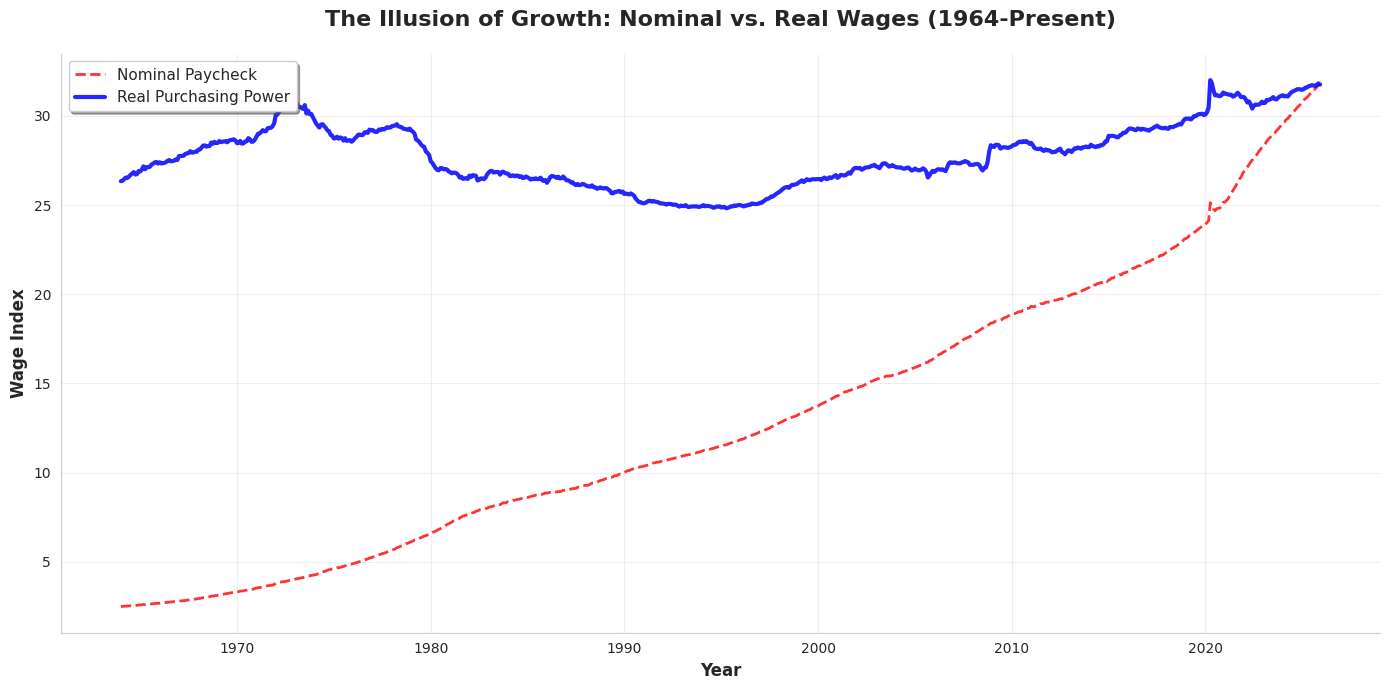

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        color='red', linestyle='--', linewidth=2,
        label='Nominal Paycheck', alpha=0.8)

ax.plot(df.index, df['Real_Wage'],
        color='blue', linewidth=3,
        label='Real Purchasing Power', alpha=0.85)

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage Index', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)

# Add annotation for 2020 pandemic spike
# Find the approximate location of 2020 in your data
pandemic_date = '2020'
if pandemic_date in df.index.astype(str):
    pandemic_value = df.loc[pandemic_date, 'Real_Wage']

    ax.annotate('Pandemic Composition Effect',
                xy=(df.index[df.index.astype(str).str.contains('2020')][0], pandemic_value),
                xytext=(df.index[df.index.astype(str).str.contains('2015')][0], pandemic_value * 1.05),
                arrowprops=dict(arrowstyle='->', color='black', lw=2),
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

# Improve grid appearance
ax.grid(True, alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

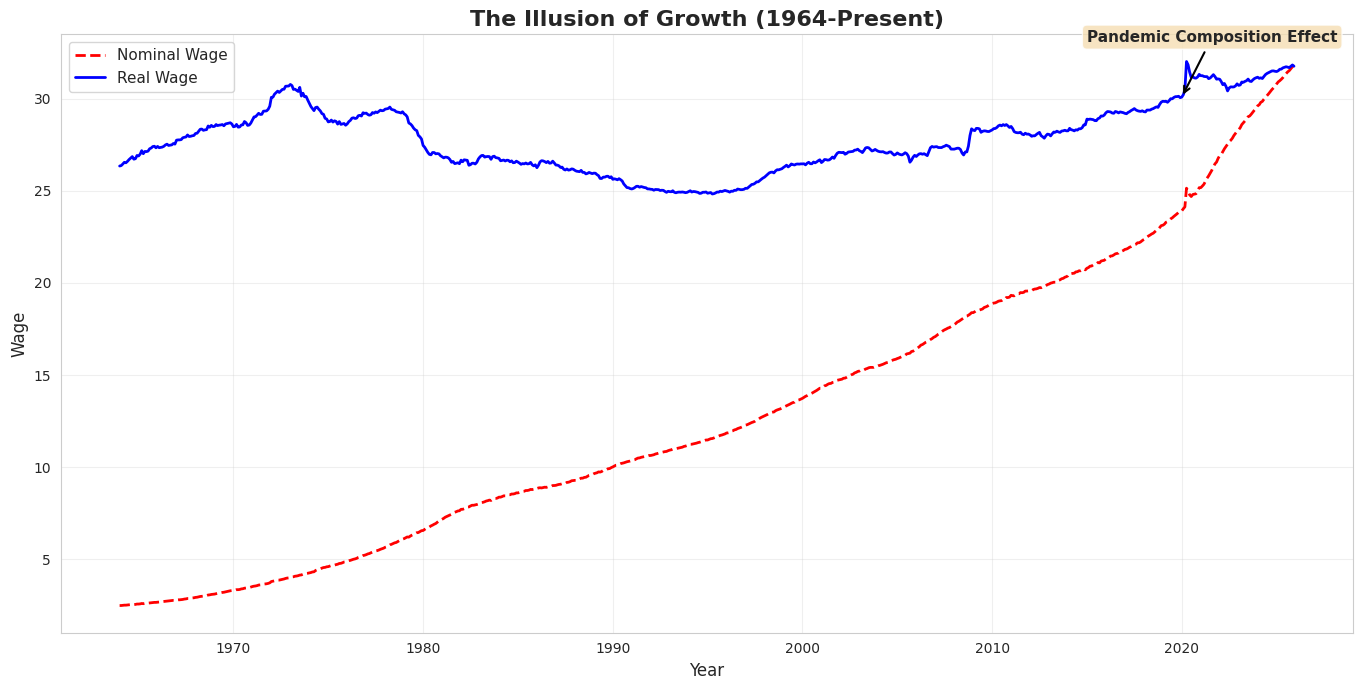

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot both wage series
ax.plot(df.index, df['Nominal_Wage'],
        color='red', linestyle='--', linewidth=2,
        label='Nominal Wage')

ax.plot(df.index, df['Real_Wage'],
        color='blue', linewidth=2,
        label='Real Wage')

# Add title and labels
ax.set_title('The Illusion of Growth (1964-Present)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Wage', fontsize=12)

# Add legend
ax.legend(loc='upper left', fontsize=11)

# Add annotation for 2020 pandemic spike
# Find rows from 2020
mask_2020 = df.index.year == 2020
if mask_2020.any():
    pandemic_date = df.index[mask_2020][0]
    pandemic_value = df.loc[pandemic_date, 'Real_Wage']

    # Position annotation text to the left of the spike
    text_date = df.index[df.index.year == 2015][0]  # Adjust year as needed

    ax.annotate('Pandemic Composition Effect',
                xy=(pandemic_date, pandemic_value),
                xytext=(text_date, pandemic_value * 1.1),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Add grid for readability
ax.grid(True, alpha=0.3)

# Tight layout
plt.tight_layout()

# Display
plt.show()

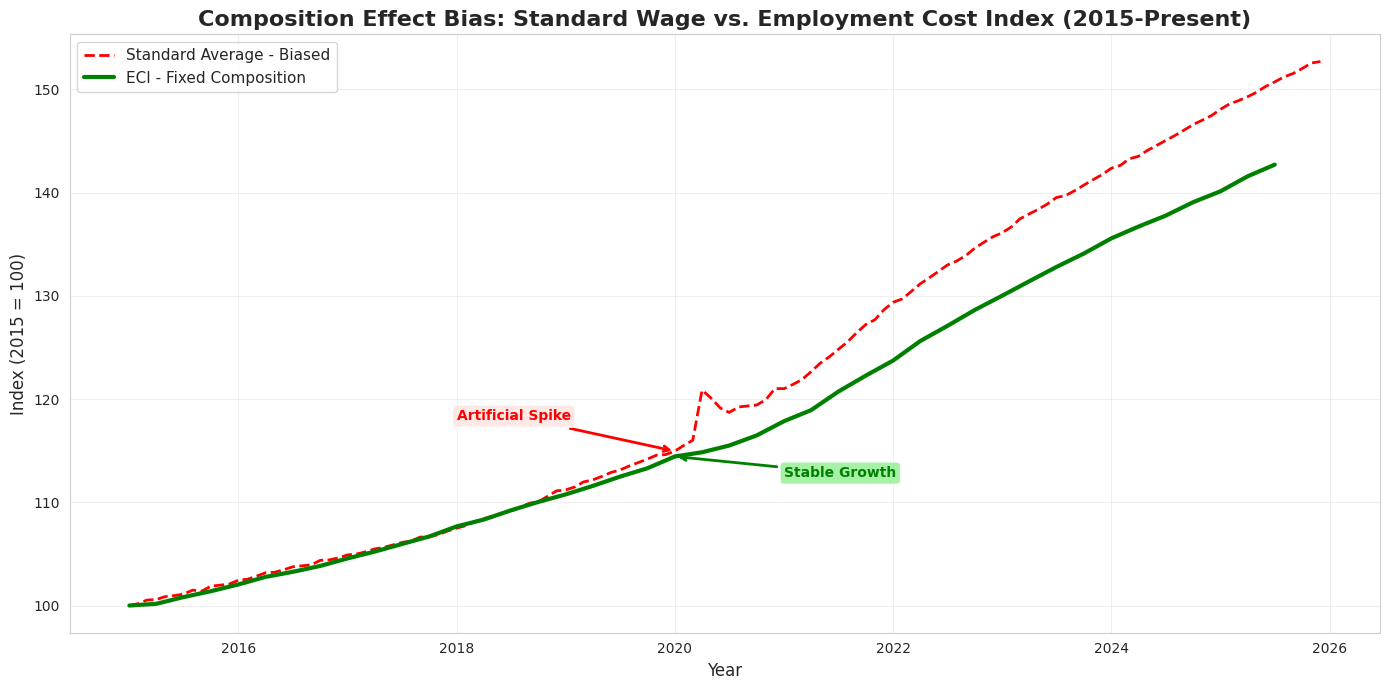

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Fetch the Employment Cost Index data
eci = fred.get_series('ECIWAG')

# 2. Filter both series to 2015 onwards
start_date = '2015-01-01'
wages_filtered = wages[wages.index >= start_date]
eci_filtered = eci[eci.index >= start_date]

# 3. Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Plot both series on the same chart
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(wages_rebased.index, wages_rebased,
        color='red', linestyle='--', linewidth=2,
        label='Standard Average - Biased')

ax.plot(eci_rebased.index, eci_rebased,
        color='green', linewidth=3,
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias: Standard Wage vs. Employment Cost Index (2015-Present)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2015 = 100)', fontsize=12)

# Add legend
ax.legend(loc='upper left', fontsize=11)

# 5. Annotate the 2020 divergence
# Find 2020 spike in standard wages
mask_2020 = wages_rebased.index.year == 2020
if mask_2020.any():
    spike_date = wages_rebased.index[mask_2020][0]
    spike_value = wages_rebased.loc[spike_date]
    eci_value = eci_rebased.loc[spike_date]

    # Annotate the artificial spike in standard data
    ax.annotate('Artificial Spike',
                xy=(spike_date, spike_value),
                xytext=(spike_date - pd.DateOffset(years=2), spike_value + 3),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=10, fontweight='bold', color='red',
                bbox=dict(boxstyle='round', facecolor='mistyrose', alpha=0.8))

    # Annotate the stable growth in ECI
    ax.annotate('Stable Growth',
                xy=(spike_date, eci_value),
                xytext=(spike_date + pd.DateOffset(years=1), eci_value - 2),
                arrowprops=dict(arrowstyle='->', color='green', lw=2),
                fontsize=10, fontweight='bold', color='green',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Add grid
ax.grid(True, alpha=0.3)

# Tight layout
plt.tight_layout()

# Display
plt.show()